In [3]:
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)


In [4]:
cell_type_u_s_path='../data/GastrulationErythroid_cell_type_u_s.csv'
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s


,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,0.043971,cell_363,Blood progenitors 2,3.460521,15.574629
1,Sox17,0.000000,0.000000,cell_382,Blood progenitors 2,2.490433,14.971734
2,Sox17,0.000000,0.018161,cell_385,Blood progenitors 2,2.351203,15.267069
3,Sox17,0.000000,0.000000,cell_393,Blood progenitors 2,5.899098,14.388825
4,Sox17,0.000000,0.000000,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
24657995,Gm47283,0.214961,1.145533,cell_139318,Erythroid3,8.032358,7.603037
24657996,Gm47283,0.300111,1.072944,cell_139321,Erythroid3,10.352904,6.446736
24657997,Gm47283,0.292607,1.199875,cell_139326,Erythroid3,9.464873,7.261099
24657998,Gm47283,0.266031,1.114659,cell_139327,Erythroid3,9.990495,7.243880


In [5]:
gene_list=['Smarca2', 'Rbms2', 'Myo1b', 'Hba-x', 'Yipf5', 'Skap1', 'Smim1', 'Nfkb1', 'Sulf2', 'Blvrb', 'Hbb-y', 'Coro2b', 'Yipf5', 'Phc2', 'Mllt3']

loss_df, cellDancer_df=cd.velocity(cell_type_u_s,\
                                   gene_list=gene_list,\
                                   permutation_ratio=0.125,\
                                   n_jobs=8)
cellDancer_df


Using /Users/kylelam/Documents/cs/cs2952g/csci2592g-final-project/src/cellDancer_velocity_2023-12-07 14-52-37 as the output path.


/Users/kylelam/anaconda3/envs/cellDancer/lib/python3.9/site-packages/datashader/bundling.py:42: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def resample_segment(segments, new_segments, min_segment_length, max_segment_length, ndims):
/Users/kylelam/anaconda3/envs/cellDancer/lib/python3.9/site-packages/datashader/bundling.py:75: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit fo

Arranging genes for parallel job.
14  genes were arranged to  2  portions.


/Users/kylelam/anaconda3/envs/cellDancer/lib/python3.9/site-packages/datashader/bundling.py:42: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def resample_segment(segments, new_segments, min_segment_length, max_segment_length, ndims):
/Users/kylelam/anaconda3/envs/cellDancer/lib/python3.9/site-packages/datashader/bundling.py:75: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit fo

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Mllt3,0.087552,0.061677,0.131864,0.347319,0.264903,0.304851,0.335579,0.111875,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Mllt3,0.042049,0.056451,0.096471,0.192440,0.253070,0.303873,0.335266,0.111875,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Mllt3,0.046162,0.073611,0.099587,0.222645,0.253818,0.304017,0.335363,0.111875,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Mllt3,0.119952,0.142994,0.156111,0.534318,0.270146,0.306117,0.336443,0.111875,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Mllt3,0.027221,0.136220,0.083502,0.221573,0.243896,0.304314,0.336083,0.111875,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172601,12324,Yipf5,0.098889,0.443361,0.090449,0.465713,0.041079,0.203310,0.469332,0.065883,cell_139318,Erythroid3,8.032358,7.603037
172602,12325,Yipf5,0.092605,0.521375,0.084460,0.529274,0.037171,0.202193,0.471633,0.065883,cell_139321,Erythroid3,10.352904,6.446736
172603,12326,Yipf5,0.108367,0.443695,0.098412,0.472939,0.042167,0.202920,0.469329,0.065883,cell_139326,Erythroid3,9.464873,7.261099
172604,12327,Yipf5,0.067904,0.431785,0.064603,0.432705,0.038088,0.204738,0.469044,0.065883,cell_139327,Erythroid3,9.990495,7.243880


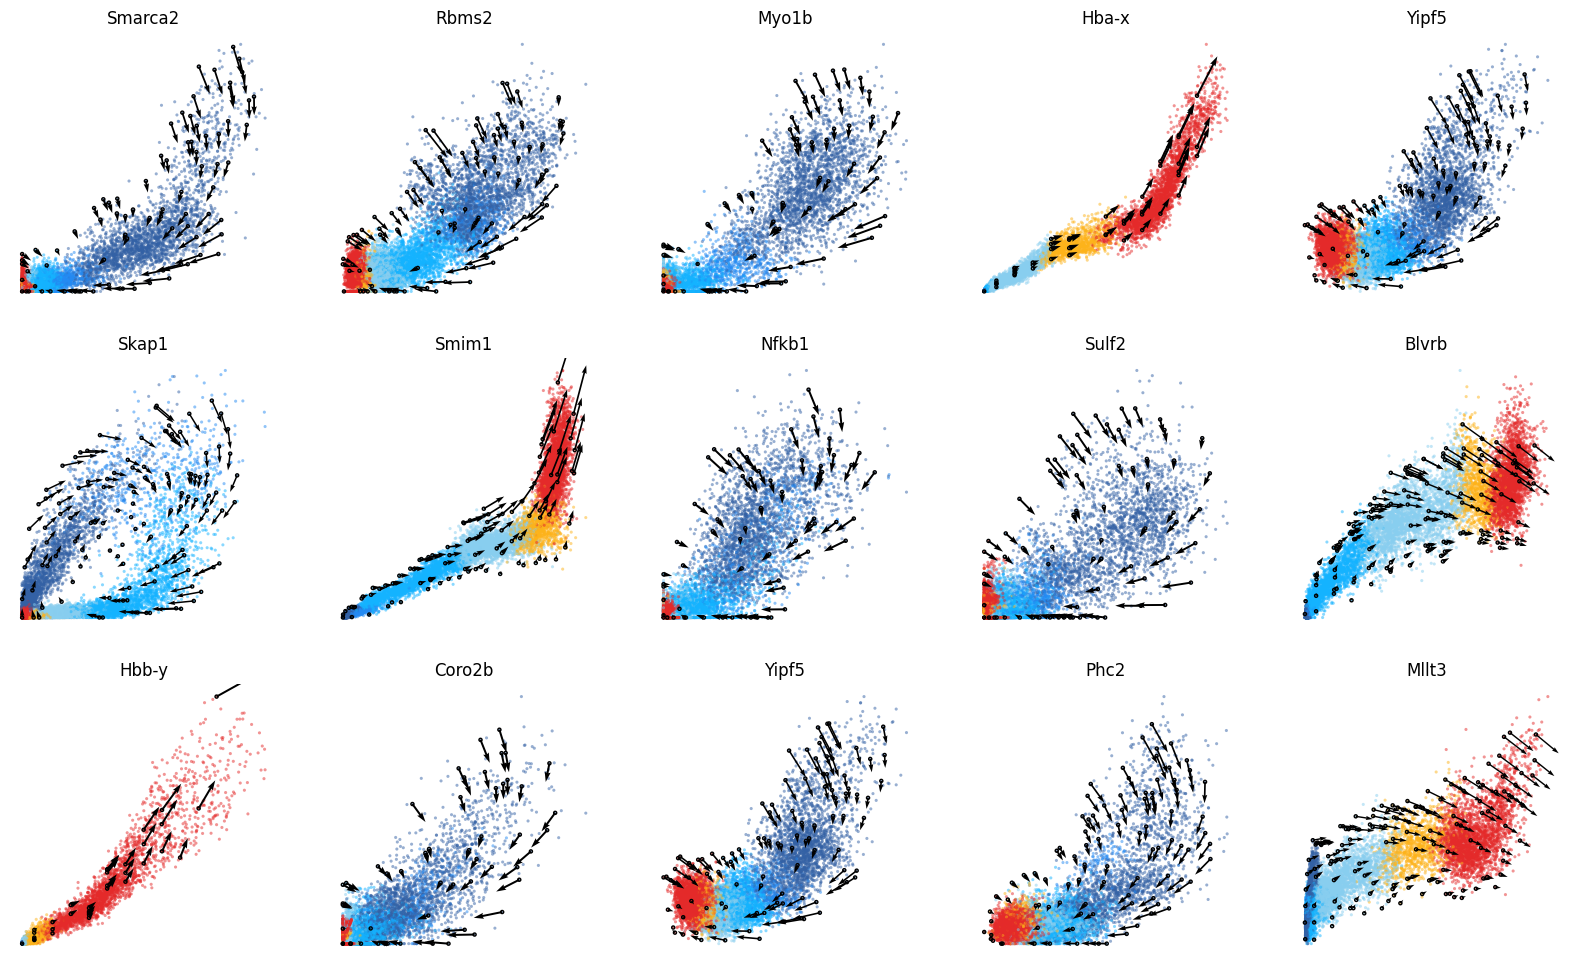

In [6]:
ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5,
        s = 5,
        velocity=True,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


In [7]:
cellDancer_df_path = './cellDancer_velocity_2023-12-05 23-22-39/cellDancer_estimation.csv'
cellDancer_df = pd.read_csv(cellDancer_df_path)


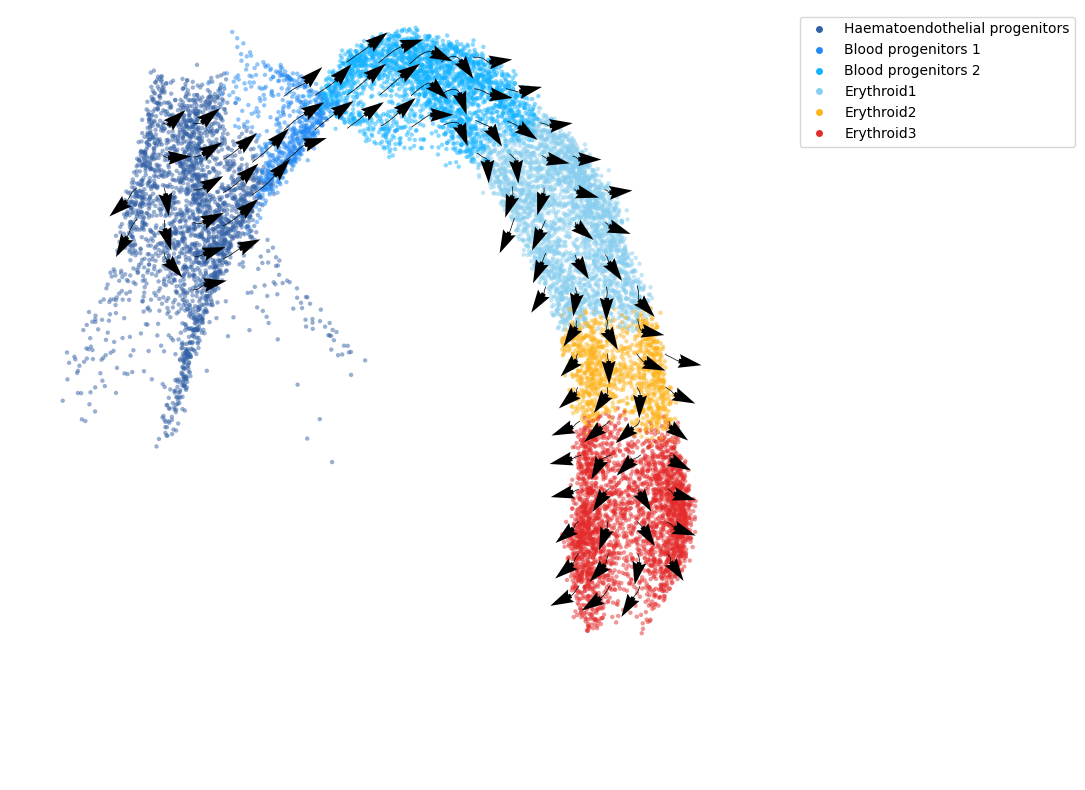

In [8]:
# compute cell velocity
cellDancer_df=cd.compute_cell_velocity(cellDancer_df=cellDancer_df, projection_neighbor_choice='gene', expression_scale='power10', projection_neighbor_size=10, speed_up=(100,100))

# plot cell velocity
fig, ax = plt.subplots(figsize=(10,10))
cdplt.scatter_cell(ax,
                   cellDancer_df,
                   colors=colormap.colormap_erythroid,
                   alpha=0.5,
                   s=10,
                   velocity=True,
                   legend='on',
                   min_mass=15,
                   arrow_grid=(20,20),
                   custom_xlim=[-6,13],
                   custom_ylim=[2,16], )
ax.axis('off')
plt.show()


In [9]:
cellDancer_df


,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2
0,0,Mllt3,0.087552,0.061677,0.131864,0.347319,0.264903,0.304851,0.335579,0.111875,cell_363,Blood progenitors 2,3.460521,15.574629,0,NaN,NaN
1,1,Mllt3,0.042049,0.056451,0.096471,0.192440,0.253070,0.303873,0.335266,0.111875,cell_382,Blood progenitors 2,2.490433,14.971734,1,NaN,NaN
2,2,Mllt3,0.046162,0.073611,0.099587,0.222645,0.253818,0.304017,0.335363,0.111875,cell_385,Blood progenitors 2,2.351203,15.267069,2,NaN,NaN
3,3,Mllt3,0.119952,0.142994,0.156111,0.534318,0.270146,0.306117,0.336443,0.111875,cell_393,Blood progenitors 2,5.899098,14.388825,3,NaN,NaN
4,4,Mllt3,0.027221,0.136220,0.083502,0.221573,0.243896,0.304314,0.336083,0.111875,cell_398,Blood progenitors 2,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172601,12324,Yipf5,0.098889,0.443361,0.090449,0.465713,0.041079,0.203310,0.469332,0.065883,cell_139318,Erythroid3,8.032358,7.603037,12324,NaN,NaN
172602,12325,Yipf5,0.092605,0.521375,0.084460,0.529274,0.037171,0.202193,0.471633,0.065883,cell_139321,Erythroid3,10.352904,6.446736,12325,NaN,NaN
172603,12326,Yipf5,0.108367,0.443695,0.098412,0.472939,0.042167,0.202920,0.469329,0.065883,cell_139326,Erythroid3,9.464873,7.261099,12326,NaN,NaN
172604,12327,Yipf5,0.067904,0.431785,0.064603,0.432705,0.038088,0.204738,0.469044,0.065883,cell_139327,Erythroid3,9.990495,7.243880,12327,NaN,NaN


Pseudo random number generator seeds are set to:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Generating Trajectories:  28%|██▊       | 2682/9510 [00:00<00:00, 23357.86it/s]/Users/kylelam/anaconda3/envs/cellDancer/lib/python3.9/site-packages/datashader/bundling.py:42: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def resample_segment(segments, new_segments, min_segment_length, max_segment_length, ndims):
/Users/kylelam/anaconda3/envs/cellDancer/lib/python3.9/site-packages/datashader/bundling.py:75: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/de

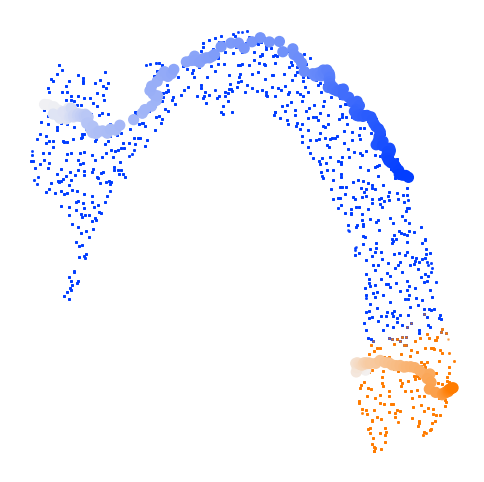

There are 2 clusters.
[0 1]


/Users/kylelam/anaconda3/envs/cellDancer/lib/python3.9/site-packages/datashader/bundling.py:42: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def resample_segment(segments, new_segments, min_segment_length, max_segment_length, ndims):
/Users/kylelam/anaconda3/envs/cellDancer/lib/python3.9/site-packages/datashader/bundling.py:75: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit fo

--- 140.24899578094482 seconds ---


In [10]:
import random
# set parameters
dt = 0.05
t_total = {dt:int(10/dt)}
n_repeats = 10

# estimate pseudotime
cellDancer_df = cd.pseudo_time(cellDancer_df=cellDancer_df,
                               grid=(30,30),
                               dt=dt,
                               t_total=t_total[dt],
                               n_repeats=n_repeats,
                               speed_up=(100,100),
                               n_paths = 2,
                               plot_long_trajs=True,
                               psrng_seeds_diffusion=[i for i in range(n_repeats)],
                               n_jobs=8)


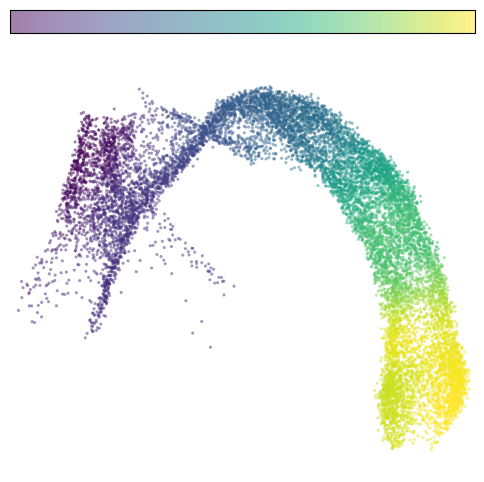

In [11]:
# plot pseudotime
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()


<AxesSubplot:>

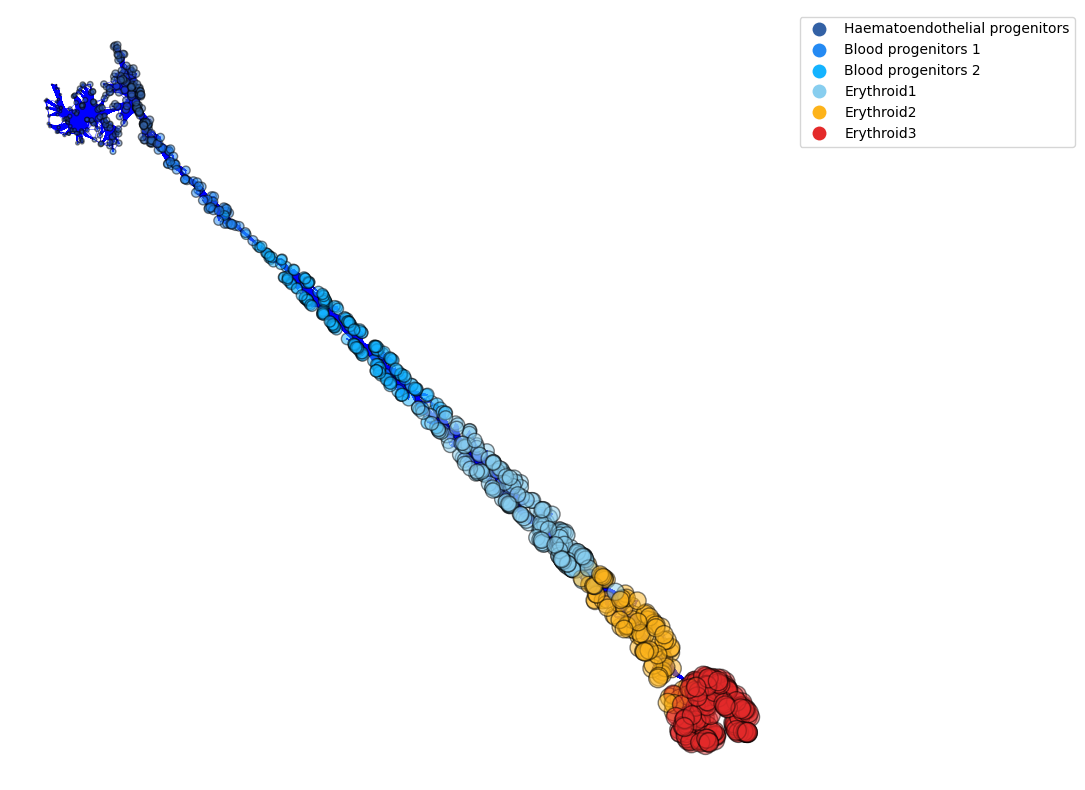

In [12]:
fig, ax= plt.subplots(figsize=(10,10))

cdplt.PTO_Graph(ax,
                cellDancer_df,
                node_layout='forcedirected',
                PRNG_SEED=10,
                use_edge_bundling=True,
                node_colors=colormap.colormap_erythroid,
                edge_length=3,
                node_sizes='pseudotime',
                colorbar='on',
                legend='on')


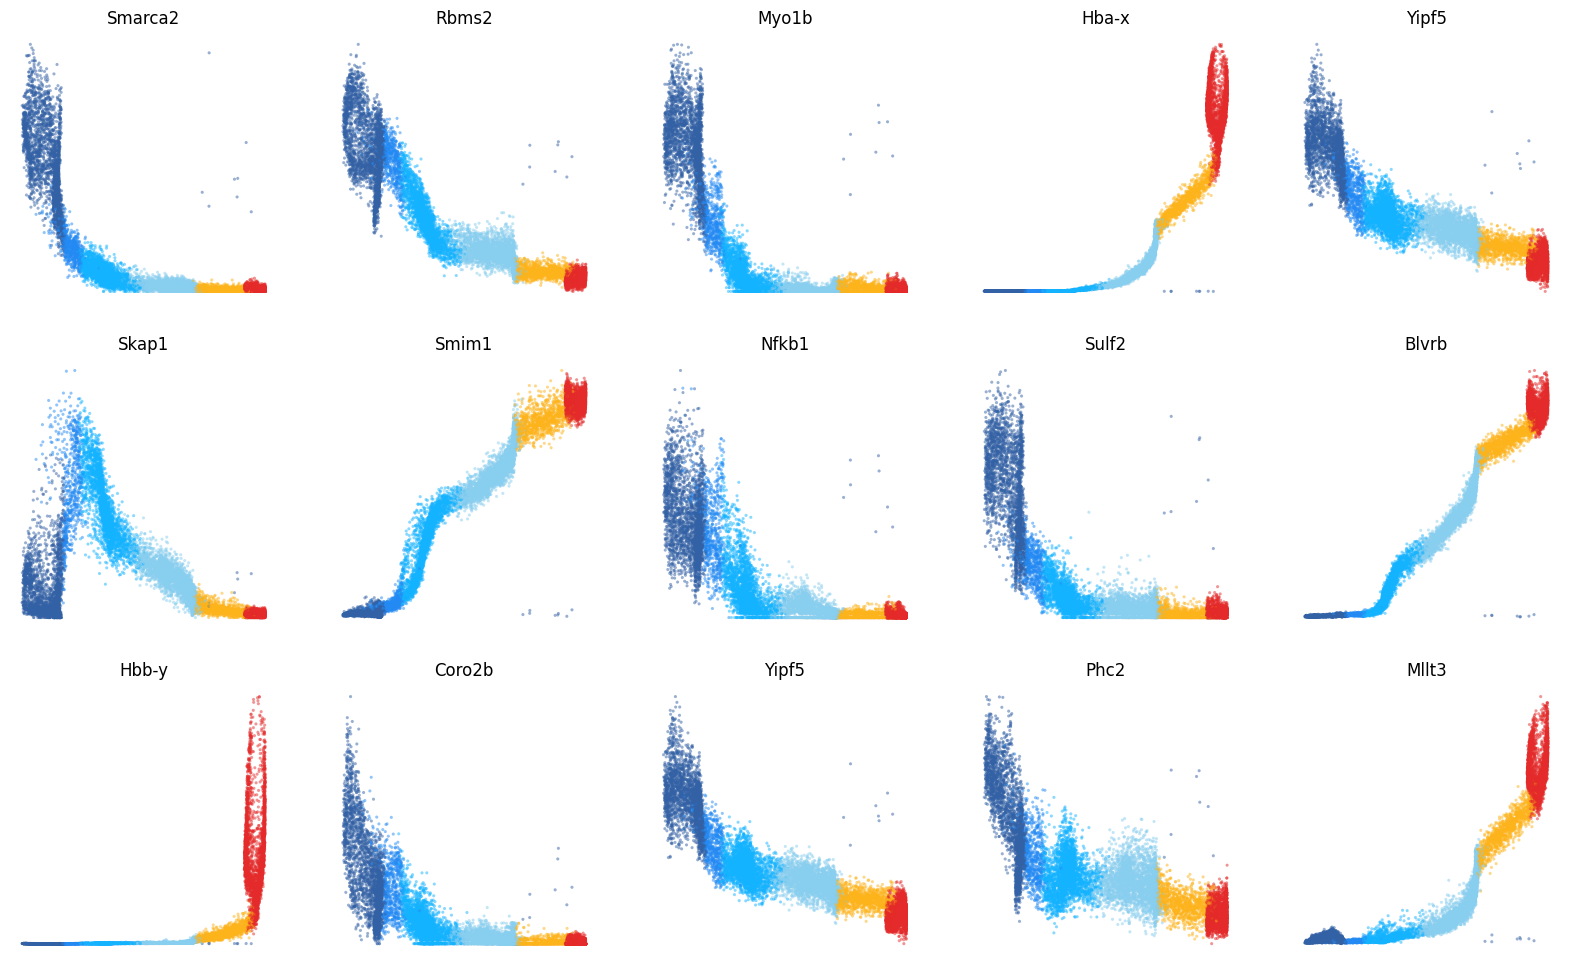

In [13]:
ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5,
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')
